In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pylab

import seaborn as sns

import csv

import scipy
from scipy import stats
import statistics

In [3]:
%matplotlib inline
import deepdish as dd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches
import numpy as np
import brainiak.eventseg.event
from scipy import stats
from scipy.stats import norm, zscore, pearsonr
from scipy.signal import gaussian, convolve
from sklearn import decomposition
import seaborn as sns 
import numpy as np

In [9]:
vectorDim = 100

numNode = 1000

reps = 40
kvalues = 20

# the data structures to save the means for the coherent and incoherent
coherent_means = np.empty(reps)
incoherent_means = np.empty(reps)

coherent_vars_1 = np.empty(reps)
coherent_vars_2 = np.empty(reps) 

incoherent_vars_1 = np.empty(reps)
incoherent_vars_2 = np.empty(reps) 

likelihood = np.zeros([kvalues,reps,2])



In [4]:
# now the radical loop: 1. run 2 reservoirs; 2. calculate time contst; 
# 3.sort;  4. segment (ubuntu)
# here we will just segment the sorted reservoir states

kvalues = 20
reps = 40
for res_seed in range(reps):
 
    ###################################################################
    #
    #               4. Segment
    
    string1 = '/home/peter/Downloads/data-sorted-states/data/sherlock-Sorted_states_seed%s.npy' % res_seed

    Sherlock_SortedStates = np.load(string1) 

    # get the pieces
    #Sherlock_time1=Sherlock_SortedStates[:,0:99]
    #Sherlock_time2=Sherlock_SortedStates[:,900:999]
    
    Sherlock_time1=Sherlock_SortedStates[:,200:299]
    Sherlock_time2=Sherlock_SortedStates[:,500:599]

    Sherlock_time1test=Sherlock_SortedStates[:,300:399]
    Sherlock_time2test=Sherlock_SortedStates[:,600:699]
    
 
    if res_seed == 0:
        Sherlock_time1_cumul = Sherlock_time1
        Sherlock_time2_cumul = Sherlock_time2
    else:
        Sherlock_time1_cumul = Sherlock_time1 + Sherlock_time1_cumul
        Sherlock_time2_cumul = Sherlock_time2 + Sherlock_time2_cumul
    
    # now test the different k values
    
    for iteration in range(kvalues):

        ###################################################################
        #
        #               4. Segment

        #simple data structure for testing

        step = 2
        # Train the two HMS with the predicted segments
        ev_time1 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time1.fit(Sherlock_time1[1000:1650,:])

        ev_time2 = brainiak.eventseg.event.EventSegment((iteration+1)*step)
        ev_time2.fit(Sherlock_time2[1000:1650,:])
        print((iteration+1)*step)

        # save the variablility scores

        coherent_ev1_var = ev_time1.event_var_
        coherent_ev2_var = ev_time2.event_var_

        # save likelihood scores
        #likelihood[iteration, res_seed,0] = ev_time1.ll_[len(ev_time1.ll_)-1]
        #likelihood[iteration, res_seed,1] = ev_time2.ll_[len(ev_time2.ll_)-1]
        a,likelihood[iteration, res_seed,0] = ev_time1.find_events(Sherlock_time1test[1000:1650,:])
        a,likelihood[iteration, res_seed,1] = ev_time2.find_events(Sherlock_time2test[1000:1650,:])


        print("res_seed = ", res_seed)
        print("Likelihood")
        print(*likelihood[iteration, res_seed,:], sep='\n')


2
res_seed =  0
Likelihood
-1121.9854839288416
-1154.2281172303112
4
res_seed =  0
Likelihood
-1203.5145198442565
-1238.7108270808308
6
res_seed =  0
Likelihood
-1299.6333398419026
-1316.5375475643739
8
res_seed =  0
Likelihood
-1377.7839078624954
-1415.6096053390452
10
res_seed =  0
Likelihood
-1504.784849528907
-1539.9527886533022
12
res_seed =  0
Likelihood
-1609.435426182977
-1650.6855781180861
14
res_seed =  0
Likelihood
-1753.2688706640315
-1833.9715182441666
16
res_seed =  0
Likelihood
-1884.787895082223
-1967.9706482609965
18
res_seed =  0
Likelihood
-1995.0801627768308
-2058.22449672876
20
res_seed =  0
Likelihood
-2089.533035986892
-2187.9237793893803
22
res_seed =  0
Likelihood
-2141.191544779148
-2296.1067162919517
24
res_seed =  0
Likelihood
-2279.834197407867
-2444.1168050459746
26
res_seed =  0
Likelihood
-2395.2342724752384
-2530.799232762579
28
res_seed =  0
Likelihood
-2516.845676887972
-2706.982350432632
30
res_seed =  0
Likelihood
-2647.658543643002
-2825.4244639585

8
res_seed =  6
Likelihood
-1271.0982582701004
-1347.549145523652
10
res_seed =  6
Likelihood
-1354.3023705760327
-1429.3390181217528
12
res_seed =  6
Likelihood
-1427.0278170527902
-1545.1101672616392
14
res_seed =  6
Likelihood
-1511.3607391601502
-1683.500805869792
16
res_seed =  6
Likelihood
-1643.7523463272503
-1843.9759787331952
18
res_seed =  6
Likelihood
-1713.5443209274786
-1941.9068892606103
20
res_seed =  6
Likelihood
-1806.2055416871494
-2048.8841817791244
22
res_seed =  6
Likelihood
-1939.6994663434243
-2163.103495849698
24
res_seed =  6
Likelihood
-2031.4897863373915
-2267.7055398857783
26
res_seed =  6
Likelihood
-2130.898532259482
-2421.4609405247807
28
res_seed =  6
Likelihood
-2236.143013430136
-2546.679497278867
30
res_seed =  6
Likelihood
-2348.300917445772
-2644.2122520871317
32
res_seed =  6
Likelihood
-2394.015650887415
-2786.6290718483506
34
res_seed =  6
Likelihood
-2564.823711069032
-2889.145442626432
36
res_seed =  6
Likelihood
-2615.1961604788635
-2995.58077

12
res_seed =  12
Likelihood
-1595.8147077683009
-1545.6505919074866
14
res_seed =  12
Likelihood
-1720.1660377794888
-1662.1617988717985
16
res_seed =  12
Likelihood
-1796.0248354607618
-1775.5020961619032
18
res_seed =  12
Likelihood
-1868.468262804584
-1852.1976200986676
20
res_seed =  12
Likelihood
-1981.0059850237972
-1949.656483887759
22
res_seed =  12
Likelihood
-2102.21407157966
-2006.8106114308375
24
res_seed =  12
Likelihood
-2239.1160613294946
-2128.325929439475
26
res_seed =  12
Likelihood
-2351.8057662234464
-2234.235015376693
28
res_seed =  12
Likelihood
-2432.652874494171
-2346.227542093344
30
res_seed =  12
Likelihood
-2558.0998874102793
-2466.3154211509845
32
res_seed =  12
Likelihood
-2692.4829997816155
-2593.477981037776
34
res_seed =  12
Likelihood
-2824.2134106152653
-2633.517210768713
36
res_seed =  12
Likelihood
-2928.956599319528
-2727.6077426492384
38
res_seed =  12
Likelihood
-2996.1847609230686
-2828.8226903780596
40
res_seed =  12
Likelihood
-3054.3089906567

14
res_seed =  18
Likelihood
-1541.3438927840743
-1682.9632337841238
16
res_seed =  18
Likelihood
-1642.1270236283106
-1824.2857807177418
18
res_seed =  18
Likelihood
-1733.286816404916
-1906.7367654384589
20
res_seed =  18
Likelihood
-1757.022984642979
-2018.9500432696716
22
res_seed =  18
Likelihood
-1862.6406747100093
-2153.0355571401356
24
res_seed =  18
Likelihood
-1977.3128713603132
-2294.8891847626473
26
res_seed =  18
Likelihood
-2053.9452096279983
-2411.14025984257
28
res_seed =  18
Likelihood
-2154.734582472046
-2542.389275058903
30
res_seed =  18
Likelihood
-2262.7268662670085
-2676.821242405535
32
res_seed =  18
Likelihood
-2339.256716474183
-2819.6758071904724
34
res_seed =  18
Likelihood
-2460.5107665884434
-2973.0560331513043
36
res_seed =  18
Likelihood
-2508.268368553449
-3031.214952511429
38
res_seed =  18
Likelihood
-2553.6920198278053
-3144.439887334142
40
res_seed =  18
Likelihood
-2789.4124046307884
-3232.18239774493
2
res_seed =  19
Likelihood
-1168.3749065194354

16
res_seed =  24
Likelihood
-1854.9420746610206
-1786.2053826430522
18
res_seed =  24
Likelihood
-1876.3572679524455
-1890.5551202437057
20
res_seed =  24
Likelihood
-1961.116782228239
-1976.8764472989128
22
res_seed =  24
Likelihood
-2080.840481947229
-2024.5044723142198
24
res_seed =  24
Likelihood
-2245.556226917201
-2185.0272745206553
26
res_seed =  24
Likelihood
-2355.8619928687363
-2291.872940797818
28
res_seed =  24
Likelihood
-2435.94188720617
-2422.3773898737504
30
res_seed =  24
Likelihood
-2527.7700174181628
-2509.982317434623
32
res_seed =  24
Likelihood
-2659.3521260001535
-2683.3120591164247
34
res_seed =  24
Likelihood
-2786.799543986243
-2777.947064358646
36
res_seed =  24
Likelihood
-2889.434996617281
-2920.598164864213
38
res_seed =  24
Likelihood
-3048.555873756654
-3089.241379211519
40
res_seed =  24
Likelihood
-3157.3456345693207
-3149.4382345920626
2
res_seed =  25
Likelihood
-1106.1953221795945
-1143.739289483228
4
res_seed =  25
Likelihood
-1181.0551261550515
-

18
res_seed =  30
Likelihood
-1927.6586695457868
-1713.731406385025
20
res_seed =  30
Likelihood
-2043.853108267512
-1721.9675609026317
22
res_seed =  30
Likelihood
-2120.459749458535
-1825.620205392019
24
res_seed =  30
Likelihood
-2255.8053594414037
-1940.2622879836001
26
res_seed =  30
Likelihood
-2298.570261726476
-2033.9058231010602
28
res_seed =  30
Likelihood
-2449.875152797468
-2135.8895976114027
30
res_seed =  30
Likelihood
-2545.7208794148028
-2242.5102129469187
32
res_seed =  30
Likelihood
-2678.7957127514874
-2359.355357046716
34
res_seed =  30
Likelihood
-2798.620895946742
-2444.7924981120977
36
res_seed =  30
Likelihood
-2922.2938418506196
-2492.4669941611182
38
res_seed =  30
Likelihood
-2959.7299553079897
-2626.9794073623866
40
res_seed =  30
Likelihood
-3066.467398843594
-2666.0840638959066
2
res_seed =  31
Likelihood
-1138.1943765184417
-1134.3399079013907
4
res_seed =  31
Likelihood
-1160.9170831256313
-1233.616814477367
6
res_seed =  31
Likelihood
-1239.615402727800

20
res_seed =  36
Likelihood
-1861.8763746643483
-1918.8539726797842
22
res_seed =  36
Likelihood
-1975.3133158971573
-2036.2660568131903
24
res_seed =  36
Likelihood
-2114.3725950965304
-2205.4418901078734
26
res_seed =  36
Likelihood
-2202.6273035793165
-2313.2147249075165
28
res_seed =  36
Likelihood
-2331.5484420291605
-2430.8405467339894
30
res_seed =  36
Likelihood
-2450.6728546736776
-2487.667219727973
32
res_seed =  36
Likelihood
-2579.5433520786164
-2616.2181211213406
34
res_seed =  36
Likelihood
-2671.7578401229257
-2753.83770757991
36
res_seed =  36
Likelihood
-2817.4413541923145
-2852.481086367218
38
res_seed =  36
Likelihood
-2870.690020198721
-2988.3406188150425
40
res_seed =  36
Likelihood
-2939.2103783913008
-3099.243226119701
2
res_seed =  37
Likelihood
-1151.6339756915356
-1063.591059213472
4
res_seed =  37
Likelihood
-1221.3533441266418
-1078.5903359178558
6
res_seed =  37
Likelihood
-1313.5734105866586
-1186.0167326277342
8
res_seed =  37
Likelihood
-1410.2882361485

In [5]:
#for the figure get the mean reservoir states
Sherlock_time1_last = Sherlock_time1
Sherlock_time2_last = Sherlock_time2

np.save('Sherlock-time1-last-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-last-june10.npy', Sherlock_time2) 



In [6]:
Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy') 
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy') 


In [7]:
Sherlock_time1 = Sherlock_time1_cumul/reps
Sherlock_time2 = Sherlock_time2_cumul/reps

In [8]:
#save the data likelihood
np.save('Sherlock-time1-june10.npy', Sherlock_time1) 
np.save('Sherlock-time2-june10.npy', Sherlock_time2) 

np.save('likelihood-SORTED-find-events.npY', likelihood) 

In [9]:
Sherlock_time1 = Sherlock_time1_last
Sherlock_time2 = Sherlock_time2_last

In [10]:
# sement and make figure

ev_time1 = brainiak.eventseg.event.EventSegment(22)
ev_time1.fit(Sherlock_time1[1000:1650,:])

ev_time2 = brainiak.eventseg.event.EventSegment(8)
ev_time2.fit(Sherlock_time2[1000:1650,:])


for j in range(99):
    mean = Sherlock_time1[:,j].mean()
    if abs(mean) > 0.01: #WAS .01
        Sherlock_time1[:,j] = Sherlock_time1[:,j]/mean

for j in range(99):
    mean = Sherlock_time2[:,j].mean()
    if abs(mean) > 0.01:
        Sherlock_time2[:,j] = Sherlock_time2[:,j]/mean

#save the data likelihood
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

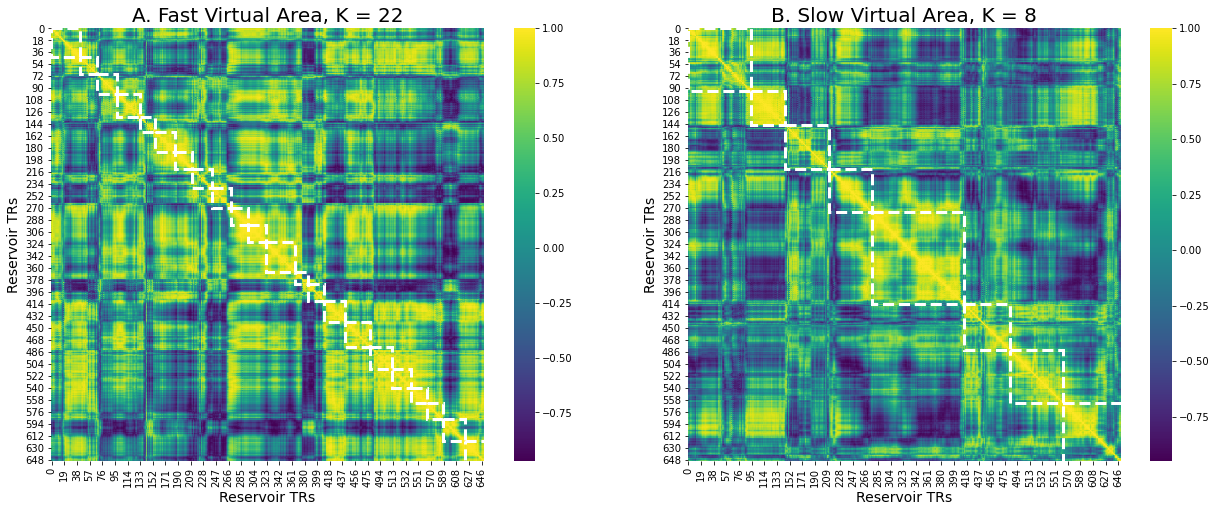

In [11]:
# 3 display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(18, 7))

fig.add_subplot(121)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(122)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)


fig.tight_layout()
plt.savefig('Exp4-june10.png')

In [12]:
tmatrix=np.zeros([kvalues,kvalues])
pmatrix=np.zeros([kvalues,kvalues])
dmatrix=np.zeros([kvalues,kvalues])
                  

In [13]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

for j in range(kvalues):
    for i in range(j):
        # when i < j
        anti = (likelihood[i,:,0]+ likelihood[j,:,1])/2 # small k with fast area + large k with slow area 
        pro = (likelihood[j,:,0]+ likelihood[i,:,1])/2  # large k with fast area + small k with slow area
        dmatrix[i,j]=np.mean(pro-anti)
        t,p = stats.ttest_rel(pro,anti)
        tmatrix[i,j]=t
        pmatrix[i,j]=p
        #if t > 0 and p< 0.01:
        if p<0.05:
            print(i,j,t,p)


0 4 2.8246952236543086 0.007420221632957129
1 4 2.6103417024307873 0.012767199409050379
2 4 2.481984172561997 0.017479185943064347
3 4 2.5782214749209698 0.013822148136602073
0 5 2.944466678984939 0.005428821700328297
1 5 2.808769209953031 0.007731272748997054
2 5 2.754659665143798 0.008881018711672763
3 5 2.7782454569079627 0.00836160910953337
0 6 2.9315864527951576 0.005616067618980933
1 6 2.8348020193643277 0.007228913760202971
2 6 2.8238523007313607 0.007436388253744132
3 6 2.8998725476757894 0.006103209655791192
0 7 3.624208163602956 0.0008268622598495796
1 7 3.6564296699925936 0.0007532944472746363
2 7 3.779165530431139 0.0005267363074724427
3 7 4.013230213037336 0.0002632299783624878
4 7 2.98784990548196 0.004840316287667485
5 7 2.93066665998619 0.005629667974804039
6 7 2.508927155049378 0.01637526807632274
0 8 3.856055748947022 0.0004200653851136293
1 8 3.86639612847783 0.00040742488733786744
2 8 4.085560390082714 0.00021185758201441157
3 8 4.357529752451789 9.27006521253066e-0

(20, 20)
29
9.686675457276932e-05
0.0001229689864446735


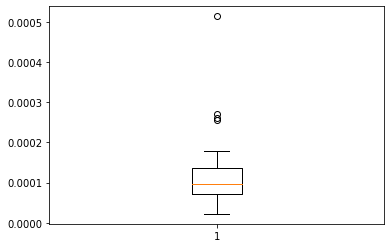

In [20]:
print(pmatrix.shape)
imin=0
imax=6#5
jmin=11#10
jmax=16#19
pmeans=np.zeros([(imax-imin)*(jmax-jmin)])
#likelihood = np.zeros([kvalues,reps,fastslow])
# compare all k pairs to see if the p values are significant

count=0
for i in range(imin,imax):
    for j in range(jmin,jmax):
        #print(i,j,pmatrix[i,j],count)
        pmeans[count]=pmatrix[i,j]
        count=count+1
print(count-1)
print(statistics.median(pmeans))
print(statistics.mean(pmeans))
plt.boxplot(pmeans)
plt.show()



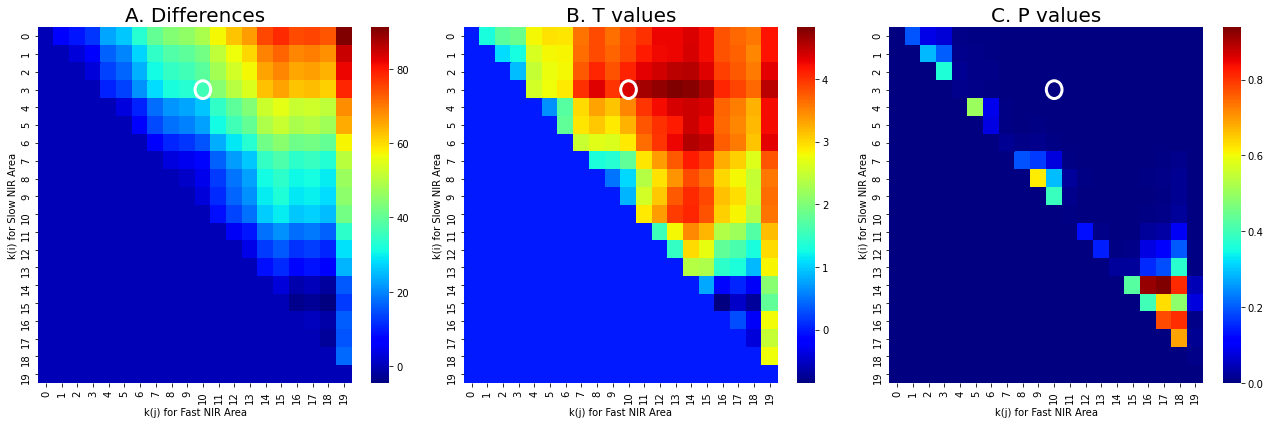

In [15]:
# 3 display the segmentation
color='jet'
ec='black'
scale=0.9
lw=2

fs1 = 14
fs2 = 20



fig=plt.figure(figsize=(18, 6))

fig.add_subplot(131)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('A. Differences', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(132)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(tmatrix, cmap=color)
plt.title('B. T values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.add_subplot(133)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('C. P values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area')
ax.set_ylabel('k(i) for Slow NIR Area')

fig.tight_layout()
plt.savefig('likelihoodk-areas-no-norm.png')

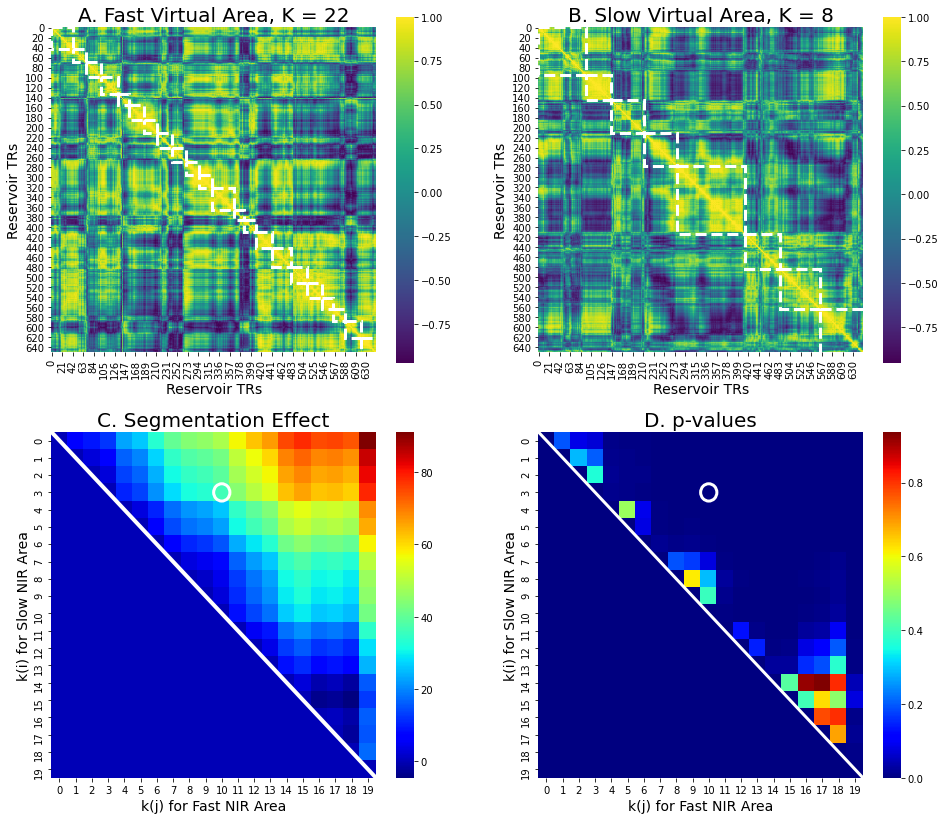

In [16]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################
color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((10.5, 3.5), 0.5, color='w', fill=False,  lw=3)
ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


NameError: name 'ev_time1' is not defined

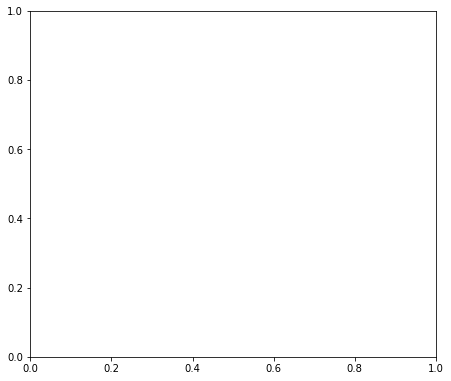

In [21]:
#new figure with the example and then the grid search
# display the segmentation
color='viridis'
ec='white'
scale=0.9
lw=3

fs1 = 14
fs2 = 20

nTR=682
fig=plt.figure(figsize=(16, 14))

fig.add_subplot(221)
bounds = np.where(np.diff(np.argmax(ev_time1.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time1),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time1[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('A. Fast Virtual Area, K = 22', fontsize = fs2)

fig.add_subplot(222)
bounds = np.where(np.diff(np.argmax(ev_time2.segments_[0], axis=1)))[0]

#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color, vmin=scale, vmax=1)
#plt.imshow(np.corrcoef(Sherlock_time2),cmap=color)
sns.heatmap(np.corrcoef(Sherlock_time2[1000:1650,:]), cmap = 'viridis',square=True)

ax = plt.gca()
bounds_aug = np.concatenate(([0],bounds,[nTR]))
for i in range(len(bounds_aug)-1):
    rect = patches.Rectangle((bounds_aug[i],bounds_aug[i]),bounds_aug[i+1]-bounds_aug[i],bounds_aug[i+1]-bounds_aug[i],linewidth=lw, linestyle='--',edgecolor=ec,facecolor='none')
    ax.add_patch(rect)

plt.xlabel('Reservoir TRs', fontsize = fs1)
plt.ylabel('Reservoir TRs', fontsize = fs1)

plt.title('B. Slow Virtual Area, K = 8', fontsize = fs2)

##########################

A1 = np.linspace(2,40,20, dtype=int)
A2 = np.linspace(2,40,20, dtype=int)

color = 'jet'
fig.add_subplot(223)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(dmatrix, cmap=color, xticklabels=A1, yticklabels=A2,vmin=-3)
plt.title('C. Segmentation Effect', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w', lw=4)



fig.add_subplot(224)
ax = fig.gca()
circle2 = plt.Circle((18.5, 11.5), 0.5, color='w', fill=False,  lw=3)
#ax.add_patch(circle2)
sns.heatmap(pmatrix, cmap=color, xticklabels=A1, yticklabels=A2, vmax = 0.001)
plt.title('D. p-values', fontsize = fs2)
ax.set_xlabel('k(j) for Fast NIR Area', fontsize = fs1)
ax.set_ylabel('k(i) for Slow NIR Area', fontsize = fs1)
ax.plot([1,0], [0,1], transform=ax.transAxes, color='w',lw=3)




#fig.tight_layout()
plt.savefig('F10-Exp4-sherlock.png', dpi=600)


Text(0, 0.5, 'Log likelihood difference')

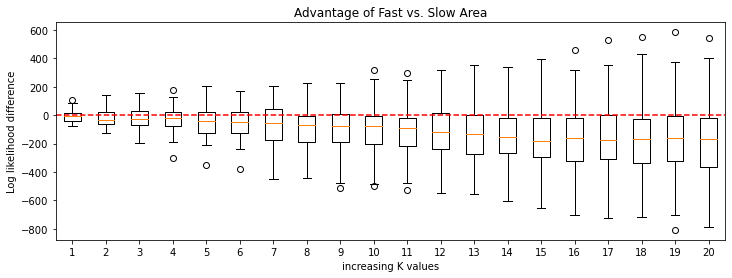

In [18]:
#likelihood = np.zeros([kvalues,reps,fastslow])
# small K is slow, likelihood 1 is slow
# high K is fast, likelihood 0 is fast

#model k
#slow slow - fast slow
#slow fast - fast fast


f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.boxplot(likelihood[:,:,1].T-likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,0].T)
#ax.boxplot(likelihood[:,:,1].T)
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

(array([1., 0., 2., 4., 6., 7., 9., 6., 3., 2.]),
 array([-1924.35722702, -1892.07528102, -1859.79333503, -1827.51138903,
        -1795.22944303, -1762.94749703, -1730.66555104, -1698.38360504,
        -1666.10165904, -1633.81971305, -1601.53776705]),
 <BarContainer object of 10 artists>)

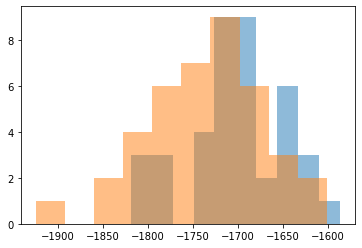

In [19]:
data3 = (likelihood[3,:,0]+ likelihood[10,:,1])/2
data4 = (likelihood[10,:,0]+ likelihood[3,:,1])/2

plt.hist(data4, alpha=0.5)
plt.hist(data3,alpha=0.5)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f53bca11490>,
 'caps': [<matplotlib.lines.Line2D at 0x7f53bca11d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f53bca110d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f53bc99b610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f53bc99ba50>,
 'means': []}

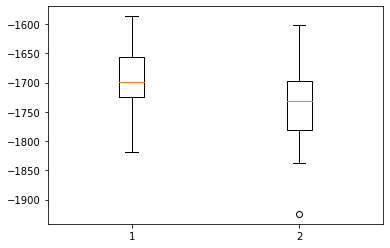

In [20]:
plt.boxplot([data4,data3])

In [21]:
#4 15 4.307048321216739 7.923701639107483e-05
t,p = stats.ttest_rel(data4,data3)
print(t)
print(p)
print(np.mean(data4-data3))

4.371649668366925
8.877129646335813e-05
36.228027076579764


In [22]:
print(np.shape(likelihood))
print(kvalues)

(20, 40, 2)
20


<AxesSubplot:>

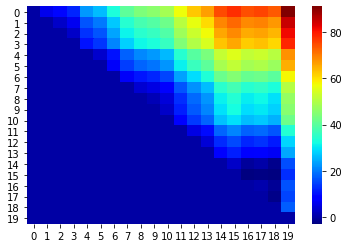

In [23]:
sns.heatmap(dmatrix,cmap='jet',vmin=-3)

In [24]:
print(dmatrix[11,13:20])
print(pmatrix[11,13:20])      

[ 9.63489224 18.1865605  21.12667363 17.70173359 18.668131   16.55612488
 34.01398418]
[0.00761884 0.00126203 0.00266729 0.02375968 0.03180979 0.09541755
 0.00302964]


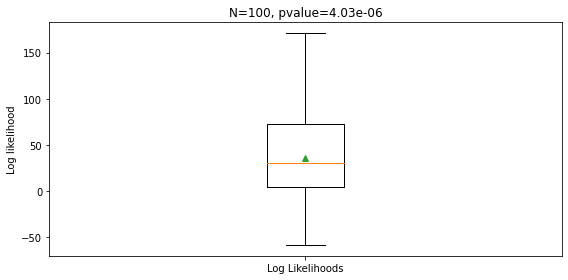

In [25]:

fig=plt.figure(figsize=(8, 4))
#f,ax = plt.subplots(1,1, figsize=(5, 5))
plt.boxplot(data4-data3,showmeans=True)
#plt.xlabel('Coherent                                    Incoherent')
plt.ylabel('Log likelihood')
#plt.axhline(y=0, color='r', linestyle='--')

plt.xticks([1], ['Log Likelihoods'])#ax.set_xticklabels(['Coherent-Incoherent'])
plt.title('N=100, pvalue=4.03e-06')
fig.tight_layout()
plt.savefig('temp2.png')

IndexError: index 25 is out of bounds for axis 0 with size 20

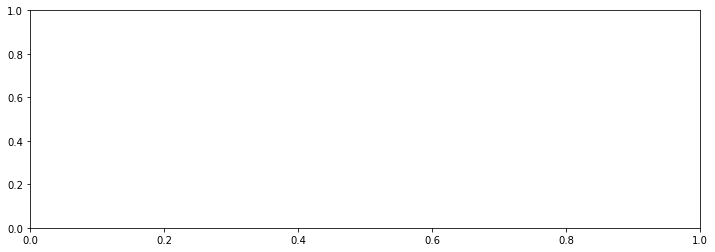

In [26]:
f, ax = plt.subplots(1,1, figsize=(12, 4))

ax.plot(likelihood[4,:,0]-likelihood[25,:,1])
#ax.boxplot(likelihood)
#ax.plot(likelihood[:,1])

plt.axhline(y=0, color='r', linestyle='--')


ax.set_title('Advantage of Fast vs. Slow Area')
ax.set_xlabel('increasing K values')
ax.set_ylabel('Log likelihood difference')
#
#sns.despine()

In [10]:
likelihood = np.load('likelihood-SORTED-find-events.npY.npy')


In [ ]:
#np.save('Sherlock-time1-june6.npy', Sherlock_time1) 
#np.save('Sherlock-time2-june6.npy', Sherlock_time2) 

#np.save('likelihood-june6.npy', likelihood) 

Sherlock_time1 = np.load('Sherlock-time1-last-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-last-june10.npy')

In [ ]:
Sherlock_time1 = np.load('Sherlock-time1-june10.npy')
Sherlock_time2 = np.load('Sherlock-time2-june10.npy')

In [ ]:
ev_time1 = brainiak.eventseg.event.EventSegment(88)
ev_time1.fit(Sherlock_time1)

ev_time2 = brainiak.eventseg.event.EventSegment(32)
ev_time2.fit(Sherlock_time2)
print((iteration+1)*step)

# save the variablility scores

coherent_ev1_var = ev_time1.event_var_
coherent_ev2_var = ev_time2.event_var_

# save likelihood scores
print(ev_time1.ll_[len(ev_time1.ll_)-1])
print(ev_time2.ll_[len(ev_time2.ll_)-1])


